In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df_ = pd.get_dummies(data = df, columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

In [ ]:
sick = df[df['HeartDisease'] == 1]

количество больных пациентов разных возрастов


(array([ 10.,  22.,  26.,  53.,  63., 126., 121.,  49.,  27.,  11.]),
 array([31. , 35.6, 40.2, 44.8, 49.4, 54. , 58.6, 63.2, 67.8, 72.4, 77. ]),
 <a list of 10 Patch objects>)

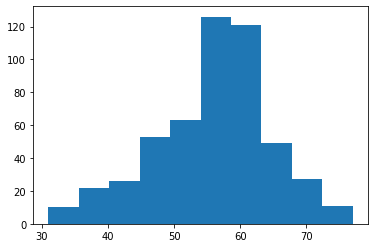

In [ ]:
print('количество больных пациентов разных возрастов')
plt.hist(sick['Age'])
# средний возраст больных - 55-65 лет

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_.drop(['HeartDisease'], axis = 1)

In [ ]:
y = df_['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
clf = DecisionTreeClassifier(random_state = 0)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
cross_val_score(clf, X_train, y_train, scoring = 'accuracy').mean()

0.8147423352902804

In [ ]:
model = RandomForestClassifier(random_state = 1)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
cross_val_score(model, X_train, y_train, scoring = 'accuracy').mean()

0.8718945112291492

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred_clf = clf.predict(X_test)

In [ ]:
y_pred_mod = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        83
           1       0.81      0.81      0.81       101

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



In [ ]:
print(classification_report(y_test, y_pred_mod))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        83
           1       0.87      0.90      0.88       101

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [ ]:
imp = pd.Series(model.feature_importances_)

In [ ]:
imp.index = pd.Series(X_train.columns)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 35, 8

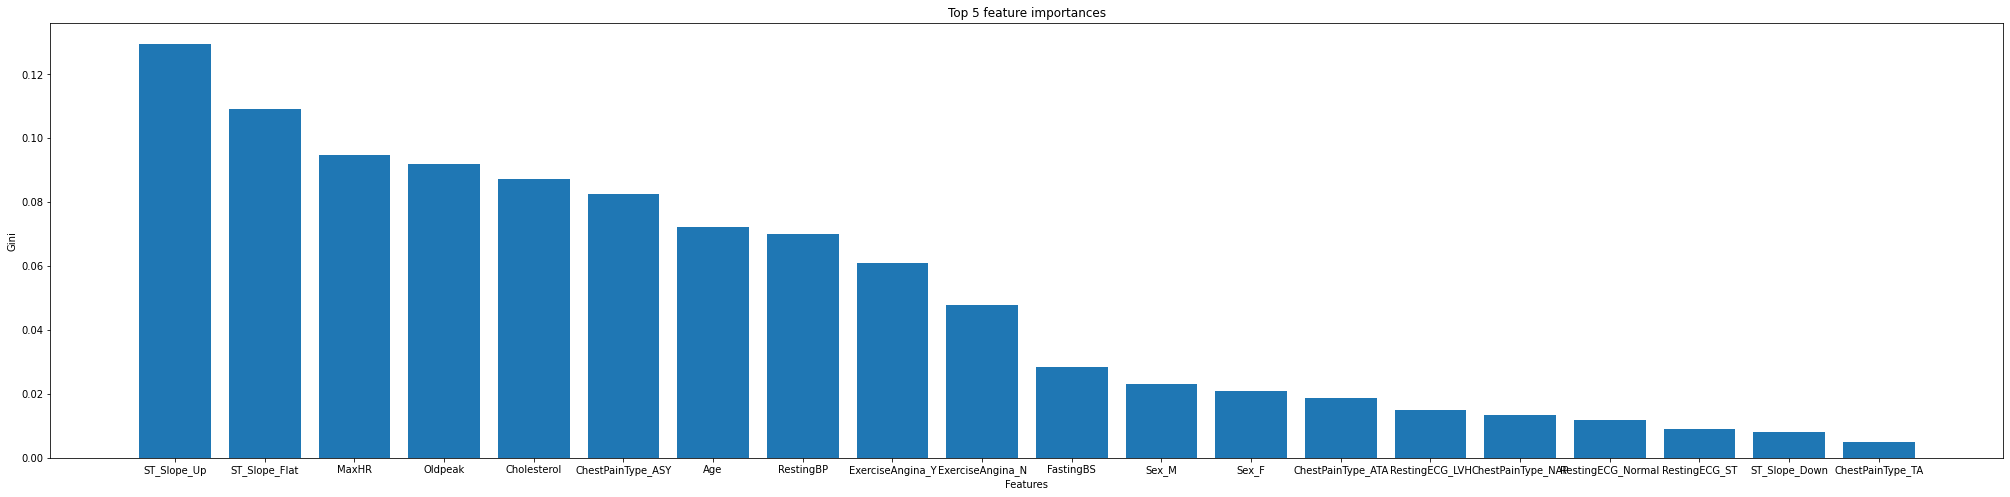

In [ ]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.sort_values(ascending=False).index, imp.sort_values(ascending = False))
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
clf_bc = BaggingClassifier(random_state = 6)

In [ ]:
clf_bc.fit(X_train, y_train)

BaggingClassifier(random_state=6)

In [ ]:
y_pred_bc = clf_bc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_bc))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        83
           1       0.86      0.82      0.84       101

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

In [ ]:
ls = LinearSVC(random_state = 4)

In [ ]:
ls.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=4)

In [ ]:
clf_st = StackingClassifier(
        [
        ('tree', clf),
        ('forest', model),
        ('linsvc', ls)
    ]
)

In [ ]:
clf_st.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

StackingClassifier(estimators=[('tree', DecisionTreeClassifier(random_state=0)),
                               ('forest',
                                RandomForestClassifier(random_state=1)),
                               ('linsvc', LinearSVC(random_state=4))])

In [ ]:
y_pred_st = clf_st.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_st))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        83
           1       0.87      0.89      0.88       101

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

